In [23]:
#Import data
input_file = "CS170_Small_Data__96.txt"

input_data: list[(list[float], int)] = []
FEATURES = 0
CLASS = 1

def import_data(file: str):
    input_data.clear()
    with open(file, 'r') as f:
        for line in f:
            f_list = [float(i) for i in line.split(" ") if i.strip()]
            input_data.append((f_list[1:], f_list[0]))

import_data(input_file)
print(input_data[0])

([-0.084975892, 1.4136573, 0.95165009, -0.6215477, -0.19397639, 0.19818832], 2.0)


In [24]:
import math

#Euclidean distance
#p1 and p2 must have the same dimensionality
def dist(p1: list[float], p2: list[float]) -> float:
    sum = 0
    for i in range(len(p1)):
        sum += math.pow(p1[i] - p2[i], 2)
    return math.sqrt(sum)

print("example euclidean distance: ", dist([1.0, 2.0], [2.0, 1.0]))

example euclidean distance:  1.4142135623730951


In [25]:
#I will use this hardcoded K value
K = 7

#K nearest neighbors
# returns the Classification (1 or 2)
def KNN(p: list[float], data: list[(list[float], int)], k: int) -> int:
    d: list[(float, int)] = []
    for i, tuple in enumerate(data):
        d.append((dist(p, tuple[FEATURES]), tuple[CLASS]))
    d.sort()
    d = d[:k]

    # this part is hard coded to the data:
    # classes are 1 and 2
    a = 0
    b = 0
    for i, item in enumerate(d):
        if item[CLASS] == 1:
            a += 1
        else:
            b += 1

    if a > b:
        return 1
    else:
        return 2

#nearest neighbor
# returns the Classification (1 or 2)
def NN(p: list[float], data: list[(list[float], int)], skip: int =-1) -> int:
    best_dist = float('inf')
    best_class = -1
    for i, tuple in enumerate(data):
        if i == skip:
            continue
        test = dist(p, tuple[FEATURES])
        if test < best_dist:
            best_dist = test
            best_class = tuple[CLASS]

    return best_class

print("example classification:")
NN(input_data[0][FEATURES], input_data[1:])


example classification:


1.0

In [26]:
import copy

#classify 80% train data 20% test data
def classify8020(data: list[(list[float], int)]):
    split = int(len(data) * 0.2)
    test = data[:split]
    train = data[split:]

    num_correct = 0
    for i, tuple in enumerate(test):
        classification = NN(tuple[FEATURES], train)
        if classification == tuple[CLASS]:
            num_correct += 1
    
    return num_correct / len(test)

#leave one out
def classify(data: list[(list[float], int)]):
    total = 0
    num_correct = 0
    for i, tuple in enumerate(data):
        classification = NN(tuple[FEATURES], data, i)
        
        if classification == tuple[CLASS]:
            num_correct += 1
        total += 1
    
    return num_correct / total

#construct data given feature the numbers
def construct_data(features: list[float], data: list[(list[float], int)]) -> list[float]:
    my_data = []
    for i, tuple in enumerate(data):
        temp = []
        for feature in features:
            temp.append(tuple[FEATURES][feature-1])
        my_data.append((temp, tuple[CLASS]))
    return my_data

print("Test classification using all points")
print(classify(input_data))

print("Test classification using features 1, 3, and 6")
print(classify(construct_data([1,3,6], input_data)))


Test classification using all points
0.836
Test classification using features 1, 3, and 6
0.94


In [27]:
import copy

def forward_selection(DEBUG: bool = False):
    #for analysis
    accuracy_over_time = []
    sets_over_time = []

    best_ever = 0
    best_set_ever = []
    best_so_far = []
    for i in range(len(input_data[0][FEATURES])):
        #keeps track of best accuracy for this group
        best = 0.0
        for j in range(len(input_data[0][FEATURES])):
            #check to see if this feature exists in this feature set yet
            if j+1 in best_so_far:
                continue

            #copy over and add a new feature
            feature_set = copy.copy(best_so_far[:i])
            feature_set.append(j+1)
            
            data = construct_data(feature_set, input_data)
            accuracy = classify(data)

            if DEBUG:
                print("testing feature(s): ", feature_set, " accuracy: ", accuracy)
            
            
            # check if this set was better than any others in its group
            if accuracy > best:
                best = accuracy
                best_so_far = feature_set
            # check if this set was better than any other set ever
            if accuracy > best_ever:
                best_ever = accuracy
                best_set_ever = feature_set
        
        if DEBUG:
            print("\n Best feature was ", best_so_far, " accuracy: ", best, "\n")
        accuracy_over_time.append(best)
        sets_over_time.append(best_so_far)

    if DEBUG:
        print("Finished... The best feature set was", best_set_ever, "with an accuracy of", best_ever)

    return (best_set_ever, best_ever, accuracy_over_time, sets_over_time)

forward_selection(True)

testing feature(s):  [1]  accuracy:  0.874
testing feature(s):  [2]  accuracy:  0.682
testing feature(s):  [3]  accuracy:  0.734
testing feature(s):  [4]  accuracy:  0.718
testing feature(s):  [5]  accuracy:  0.672
testing feature(s):  [6]  accuracy:  0.746

 Best feature was  [1]  accuracy:  0.874 

testing feature(s):  [1, 2]  accuracy:  0.826
testing feature(s):  [1, 3]  accuracy:  0.866
testing feature(s):  [1, 4]  accuracy:  0.82
testing feature(s):  [1, 5]  accuracy:  0.836
testing feature(s):  [1, 6]  accuracy:  0.948

 Best feature was  [1, 6]  accuracy:  0.948 

testing feature(s):  [1, 6, 2]  accuracy:  0.904
testing feature(s):  [1, 6, 3]  accuracy:  0.94
testing feature(s):  [1, 6, 4]  accuracy:  0.904
testing feature(s):  [1, 6, 5]  accuracy:  0.938

 Best feature was  [1, 6, 3]  accuracy:  0.94 

testing feature(s):  [1, 6, 3, 2]  accuracy:  0.88
testing feature(s):  [1, 6, 3, 4]  accuracy:  0.884
testing feature(s):  [1, 6, 3, 5]  accuracy:  0.892

 Best feature was  [1,

([1, 6],
 0.948,
 [0.874, 0.948, 0.94, 0.892, 0.864, 0.836],
 [[1], [1, 6], [1, 6, 3], [1, 6, 3, 5], [1, 6, 3, 5, 4], [1, 6, 3, 5, 4, 2]])

In [28]:
def backward_selection(DEBUG:bool = False):
    #for analysis
    accuracy_over_time = []
    sets_over_time = []
    
    #best ever accuracy
    best_ever = classify(input_data)

    #best set ever
    best_set_ever = list(range(1, len(input_data[0][FEATURES])+1))

    #best set
    best_so_far = list(range(1, len(input_data[0][FEATURES])+1))

    #initial
    if DEBUG:
        print("testing feature(s): ", best_so_far, " accuracy: ", best_ever)
        print("\n Best feature was ", best_so_far, " accuracy: ", best_ever, "\n")

    for i in range(len(input_data[0][FEATURES])-1):
        best = 0.0
        curr = best_so_far
        for j in curr:
            #test a new feature set by removing a feature
            feature_set = copy.copy(curr)
            feature_set.remove(j)
            
            data = construct_data(feature_set, input_data)
            accuracy = classify(data)
            if DEBUG:
                print("testing feature(s): ", feature_set, " accuracy: ", accuracy)

            # check if this set was better than any others in its group
            if accuracy > best:
                best = accuracy
                best_so_far = feature_set
            # check if this set was better than any other set ever
            if accuracy > best_ever:
                best_ever = accuracy
                best_set_ever = feature_set
        

        #if DEBUG:
        print("\n Best feature was ", best_so_far, " accuracy: ", best, "\n")
        accuracy_over_time.append(best)
        sets_over_time.append(best_so_far)

    if DEBUG:
        print("Finished... The best feature set was", best_set_ever, "with an accuracy of", best_ever)
    
    return (best_set_ever, best_ever, accuracy_over_time, sets_over_time)

backward_selection(True)

testing feature(s):  [1, 2, 3, 4, 5, 6]  accuracy:  0.836

 Best feature was  [1, 2, 3, 4, 5, 6]  accuracy:  0.836 

testing feature(s):  [2, 3, 4, 5, 6]  accuracy:  0.736
testing feature(s):  [1, 3, 4, 5, 6]  accuracy:  0.864
testing feature(s):  [1, 2, 4, 5, 6]  accuracy:  0.816
testing feature(s):  [1, 2, 3, 5, 6]  accuracy:  0.828
testing feature(s):  [1, 2, 3, 4, 6]  accuracy:  0.872
testing feature(s):  [1, 2, 3, 4, 5]  accuracy:  0.818

 Best feature was  [1, 2, 3, 4, 6]  accuracy:  0.872 

testing feature(s):  [2, 3, 4, 6]  accuracy:  0.73
testing feature(s):  [1, 3, 4, 6]  accuracy:  0.884
testing feature(s):  [1, 2, 4, 6]  accuracy:  0.862
testing feature(s):  [1, 2, 3, 6]  accuracy:  0.88
testing feature(s):  [1, 2, 3, 4]  accuracy:  0.792

 Best feature was  [1, 3, 4, 6]  accuracy:  0.884 

testing feature(s):  [3, 4, 6]  accuracy:  0.74
testing feature(s):  [1, 4, 6]  accuracy:  0.904
testing feature(s):  [1, 3, 6]  accuracy:  0.94
testing feature(s):  [1, 3, 4]  accuracy:

([1, 6],
 0.948,
 [0.872, 0.884, 0.94, 0.948, 0.874],
 [[1, 2, 3, 4, 6], [1, 3, 4, 6], [1, 3, 6], [1, 6], [1]])

In [29]:
#expect 0.947
import_data("CS170_Large_Data__21.txt")
print("Test classification using features 37, 36, and 40")
print(classify(construct_data([37,36,40], input_data)))

#expect 0.916
import_data("CS170_Small_Data__6.txt")
print("Test classification using features 2, 5, 3")
print(classify(construct_data([2,5,3], input_data)))

#expect 0.947
import_data("CS170_Large_Data__96.txt")
print("Test classification using features 21,8,10")
print(classify(construct_data([21,8,10], input_data)))

#expect 0.936
import_data("CS170_Small_Data__88.txt")
print("Test classification using features 5,2,1")
print(classify(construct_data([5,2,1], input_data)))

#expect 0.954
import_data("CS170_Large_Data__6.txt")
print("Test classification using features 22,1,6")
print(classify(construct_data([22,1,6], input_data)))

Test classification using features 37, 36, and 40
0.947
Test classification using features 2, 5, 3
0.916
Test classification using features 21,8,10
0.947
Test classification using features 5,2,1
0.936
Test classification using features 22,1,6
0.954


In [30]:
import time

# my small data set
import_data("CS170_Small_Data__47.txt")

start = time.time()
small_backward_data = backward_selection()
print("Backward Selection on Small Data 47: ", small_backward_data[:2])
small_backward_time = round(time.time() - start, 2)
print("Time Taken: ", small_backward_time, "s")


start = time.time()
small_forward_data = forward_selection()
print("Forward Selection on Small Data 47: ", small_forward_data[:2])
small_forward_time = round(time.time() - start, 2)
print("Time Taken: ", small_forward_time, "s")


 Best feature was  [1, 2, 4, 5, 6]  accuracy:  0.864 


 Best feature was  [1, 4, 5, 6]  accuracy:  0.902 


 Best feature was  [1, 4, 5]  accuracy:  0.942 


 Best feature was  [1, 4]  accuracy:  0.96 


 Best feature was  [4]  accuracy:  0.834 

Backward Selection on Small Data 47:  ([1, 4], 0.96)
Time Taken:  6.0 s
Forward Selection on Small Data 47:  ([4, 1], 0.96)
Time Taken:  4.87 s


In [31]:
import time

# my small data set
import_data("CS170_Large_Data__80.txt")

start = time.time()
large_backward_data = backward_selection()
print("Backward Selection on Large Data 80: ", large_backward_data[:2])
large_backward_time = round(time.time() - start, 2)
print("Time Taken: ", large_backward_time, "s")

start = time.time()
large_forward_data = forward_selection()
print("Forward Selection on Large Data 80: ", large_forward_data[:2])
large_forward_time = round(time.time() - start, 2)
print("Time Taken: ", large_forward_time, "s")


 Best feature was  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]  accuracy:  0.721 


 Best feature was  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]  accuracy:  0.736 


 Best feature was  [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]  accuracy:  0.734 


 Best feature was  [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40]  accuracy:  0.743 


 Best feature was  [1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40]  accuracy:  0.741 


 Best feature was  [1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24

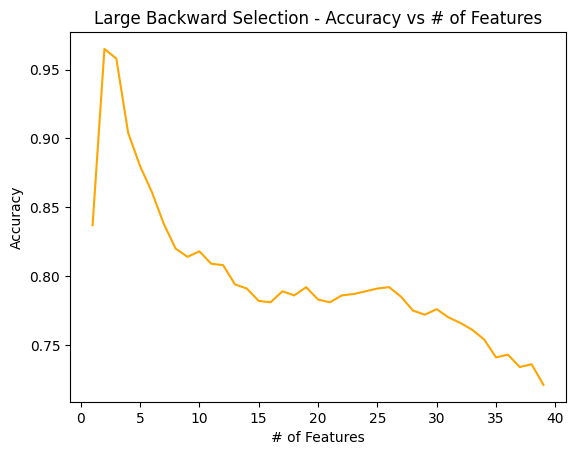

In [32]:
from matplotlib import pyplot as plt

#analysis of large dataset backward

number_of_features = []
for set in large_backward_data[3]:
    number_of_features.append(len(set))

plt.plot(number_of_features, large_backward_data[2], color='orange')
plt.xlabel('# of Features')
plt.ylabel('Accuracy')
plt.title('Large Backward Elimination - Accuracy vs # of Features')
plt.show()

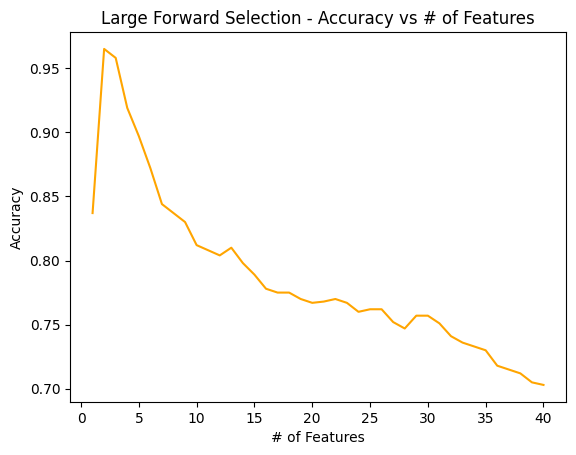

In [36]:
#analysis of large dataset forward

number_of_features = []
for set in large_forward_data[3]:
    number_of_features.append(len(set))

plt.plot(number_of_features, large_forward_data[2], color='orange')
plt.xlabel('# of Features')
plt.ylabel('Accuracy')
plt.title('Large Forward Selection - Accuracy vs # of Features')
plt.show()

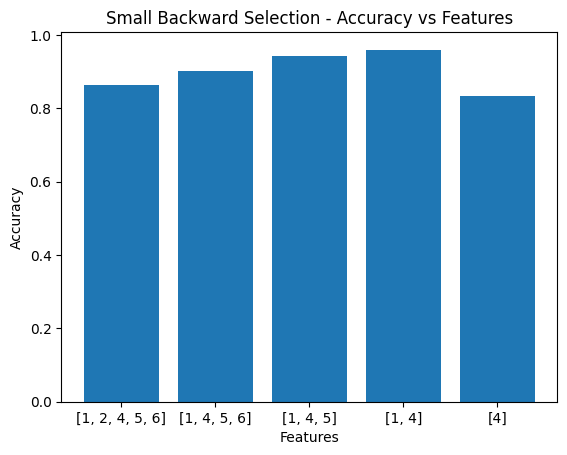

In [34]:
#analysis of small dataset backward

features = []
for set in small_backward_data[3]:
    features.append(str(set))

plt.bar(features, small_backward_data[2])
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.title('Small Backward Selection - Accuracy vs Features')
plt.show()

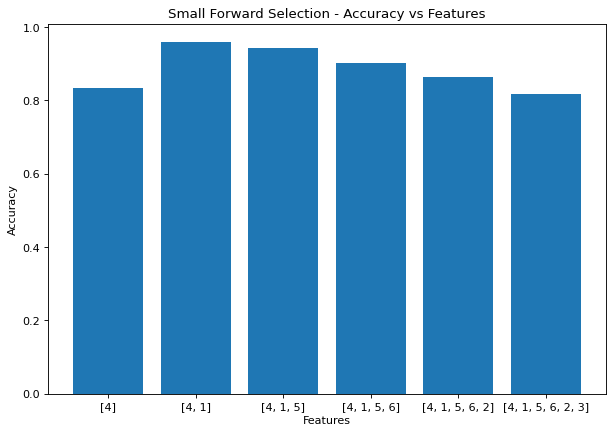

In [37]:
#analysis of small dataset forward
from matplotlib.pyplot import figure

figure(figsize=(9, 6), dpi=80)
features.clear()

for set in small_forward_data[3]:
    features.append(str(set))

plt.bar(features, small_forward_data[2])
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.title('Small Forward Selection - Accuracy vs Features')
plt.show()